Code to test a method for sampling from a distribution of 1-d subspaces and also calculating the probability of a given subspace under the distribution.

We sample from a distibution of 1-d subspaces of an ambient $k$ dimensional space in a two-step process: 

1) We sample an $x \sim \mathcal{N}(\mu, \sigma I)$, for some $\mu \in \mathbb{R}^k, \sigma \in \mathbb{R}_+$

2) We calculate $s = \frac{x}{||x||_2}$, and let $s$ represent the 1-d subspace.   

Note that in step (2) we implictly choose to represent a 1-d subspace with a unit vector in that space.  For any subspace, there are two such vectors (different in sign).  We can pick either vector to represent the subspace because (1) both represent the same subspace and (2) our method of calculating the probability for a subspace represented by $s$ is invariant to the sign of $s$.

To calculate the probability of a subspace, s, we calculate the probability of s being
generated from the above process.  This is equivalent to saying we define the probability of a subspace to be equal to the probability that a randomly generated x will fall in the subspace represented.  Let $p(s)$ indicate the probability of a subspace represented by s.  It can be shown that:

$p(s) = (2 \pi \sigma^2)^{\frac{1-k}{2}}e^{-\frac{1}{2\sigma^2}\left(\mu^T[I - ss^T]\mu \right)}$


In [132]:
import numpy as np
from matplotlib import pyplot as plt

## Define parameters here

In [206]:
# Parameters of distribution on x
mu = np.asarray([1, 1]) 
sigma = 1

# For this work, we will work with 1-d subspaces which live in a 2-d ambient space.  
# In this case, we can associate subspaces uniquely with an angle \theta \in [0, \pi], 
# where the anlge is the angle from the positice x-axis of a line passing through 
# the origin, with the line being the subspace parameterized by that angle

n_theta_smps = 1000
theta_smps = np.linspace(0, np.pi, n_theta_smps) # The theta values we will sample

## Define function for calculating pdf

In [207]:
def p_ss(s, mn, sig):
    n_dims = len(s)
    
    s = np.expand_dims(s, 1)
    mn = np.expand_dims(mn, 1)
    
    var = sig**2
    
    term1 = (2*np.pi*var)**(.5*(1-n_dims))
    
    p_mat = np.eye(n_dims) - np.matmul(s, s.transpose())
    term2 = np.exp(-.5*np.matmul(mn.transpose(), np.matmul(p_mat, mn))/var)
        
    return term1*term2
    

## Display the pdf of subspaces 

In [208]:
p_s = np.zeros(n_theta_smps)
for i in range(n_theta_smps):
    v = np.asarray([np.cos(theta_smps[i]), np.sin(theta_smps[i])])
    p_s[i] = p_ss(v, mu, sigma)
    
    

Text(0, 0.5, 'p(s)')

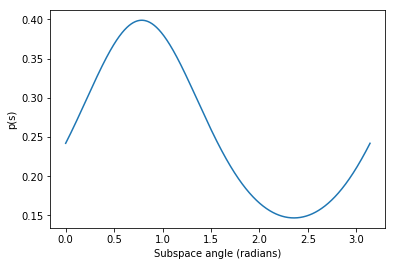

In [209]:
plt.plot(theta_smps, p_s)
plt.xlabel('Subspace angle (radians)')
plt.ylabel('p(s)')

## Make sure the pdf sums to one

In [210]:
pdf_int = np.sum(p_s)*(np.pi/n_theta_smps)
print(pdf_int)

0.8083835651480591
